In [ ]:
#class MLModel(metaclass=abc.ABCMeta):

 #   def __init__(self, dataSet=None):
        if dataSet is not None:
            self.objects = dataSet.objects
            self.labels = dataSet.labels
            self.obj_validation = dataSet.obj_validation
            self.labels_validation = dataSet.labels_validation
            self.number_labels = dataSet.number_labels
            self.n_classes = dataSet.n_classes
        self.init_model()

    @abstractmethod
    def init_model(self):
        pass

    @abstractmethod
    def train(self):
        pass

    @abstractmethod
    def predict(self, object):
        pass

    @abstractmethod
    def evaluate(self):
        score = self.get_model().evaluate(self.obj_validation, self.labels_validation, verbose=0)
        print("%s: %.2f%%" % (self.get_model().metrics_names[1], score[1] * 100))

    @abstractmethod
    def get_model(self):
        pass

In [ ]:
class ConvolutionalModel(MLModel):

    def __init__(self, dataSet=None):
        if dataSet is None:
            raise Exception("DataSet is required in this model")
        self.shape = numpy.array([constant.IMG_WIDTH, constant.IMG_HEIGHT, 1])
        super().__init__(dataSet)
        self.cnn.compile(loss=constant.LOSS_FUNCTION,
                         optimizer=Common.get_sgd_optimizer(),
                         metrics=[constant.METRIC_ACCURACY])

    def init_model(self):
        self.cnn = Sequential()

        self.cnn.add(Convolution2D(32, 3, padding=constant.PADDING_SAME, input_shape=self.shape))
        self.cnn.add(Activation(constant.RELU_ACTIVATION_FUNCTION))
        self.cnn.add(Convolution2D(32, 3, 3))
        self.cnn.add(Activation(constant.RELU_ACTIVATION_FUNCTION))
        self.cnn.add(MaxPooling2D(pool_size=(2, 2)))
        self.cnn.add(Dropout(constant.DROP_OUT_O_25))

        self.cnn.add(Convolution2D(64, 3, padding=constant.PADDING_SAME))
        self.cnn.add(Activation(constant.RELU_ACTIVATION_FUNCTION))
        self.cnn.add(Convolution2D(64, 3, 3))
        self.cnn.add(Activation(constant.RELU_ACTIVATION_FUNCTION))
        self.cnn.add(MaxPooling2D(pool_size=(2, 2)))
        self.cnn.add(Dropout(constant.DROP_OUT_O_25))

        self.cnn.add(Flatten())
        self.cnn.add(Dense(constant.NUMBER_FULLY_CONNECTED))
        self.cnn.add(Activation(constant.RELU_ACTIVATION_FUNCTION))
        self.cnn.add(Dropout(constant.DROP_OUT_0_50))
        self.cnn.add(Dense(self.n_classes))
        self.cnn.add(Activation(constant.SOFTMAX_ACTIVATION_FUNCTION))
        self.cnn.summary()

    def train(self, n_epochs=20, batch=32):
        self.cnn.fit(self.objects, self.labels,
                       batch_size=batch,
                       epochs=n_epochs, shuffle=True)

    def get_model(self):
        return self.cnn

    def predict(self, image):
        image = Common.to_float(image)
        result = self.cnn.predict(image)
        print(result)

    def evaluate(self):
       super(ConvolutionalModel, self).evaluate()

In [ ]:
cnn = ConvolutionalModel(dataSet)
cnn.train(n_epochs=50)
cnn.evaluate()
cnn.predict(np.expand_dims(image, axis=0))

**MTCNN**

In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.0 MB/s 


In [ ]:
from mtcnn import MTCNN
import cv2
img = cv2.cvtColor(cv2.imread("ivan.jpg"), cv2.COLOR_BGR2RGB)
detector = MTCNN()
result=detector.detect_faces(img)
for face in result:
    print(face)

{'box': [401, 186, 283, 399], 'confidence': 0.9990456700325012, 'keypoints': {'left_eye': (470, 350), 'right_eye': (606, 345), 'nose': (536, 443), 'mouth_left': (487, 499), 'mouth_right': (598, 494)}}


In [ ]:
#from matplotlib import pyplot
#from matplotlib.patches import Rectangle

#x, y, width, height = face['box']
#rect = Rectangle((x, y), width, height, fill=False, color='red')

(660, 367)
(200, 111)


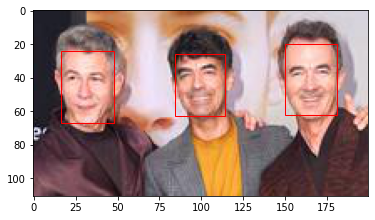

[(150, 20, 31, 42), (16, 24, 32, 43), (84, 26, 30, 37)]


In [ ]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
from PIL import Image

b=[]
def face_detect(filename, faces):
    data=pyplot.imread(filename)
    pyplot.imshow(data)
    ax=pyplot.gca()

    for face in faces:
        x,y,width,height=face["box"]
        box=(x,y,width,height)
        b.append(box)
        #print(b)
        rect=Rectangle((x,y),width,height,fill=False,color="red")
        ax.add_patch(rect)
        #for key,value in face['keypoints'].items():
         #   dot=Circle(value,radius=1.5,color="yellow")
          #  ax.add_patch(dot)

    pyplot.show()


basewidth=200
img=Image.open("image1.jpg")
print(img.size)
wpercent=(basewidth/float(img.size[0]))
#print(wpercent)
hsize=int((float(img.size[1])*float(wpercent)))
img=img.resize((basewidth,hsize),Image.ANTIALIAS)
img.save("resized_image.jpg")
print(img.size)

filename="resized_image.jpg"
pixels=pyplot.imread(filename)

detector=MTCNN()
faces=detector.detect_faces(pixels)
face_detect(filename, faces)

print(b) #(left,right,width,height)

for bb in b:
    box=bb
    box=(box[0],box[1],box[2]+box[0],box[3]+box[1])
    c=img.crop(box) #(left,upper,right,lower)
    #print(c.size)
    #pyplot.imshow(c)
    c.save(f"cropped_image{box[0]}.jpg")


*Contrast Checking*

In [ ]:
from skimage.exposure import is_low_contrast
is_low_contrast(img)

False

In [ ]:
import cv2
import numpy as np

# load image as YUV (or YCbCR) and select Y (intensity)
# or convert to grayscale, which should be the same.
# Alternately, use L (luminance) from LAB.
img = cv2.imread("contrast2.jpg")
Y = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)[:,:,0]
print(np.array(img))
# compute min and max of Y
min = np.min(Y)
max = np.max(Y)

contrast = (max-min)/(max+min)
print(min,max,contrast)


[[[103 103 103]
  [105 105 105]
  [104 104 104]
  ...
  [ 89  89  89]
  [ 87  87  87]
  [ 87  87  87]]

 [[105 105 105]
  [107 107 107]
  [105 105 105]
  ...
  [ 91  91  91]
  [ 90  90  90]
  [ 90  90  90]]

 [[106 106 106]
  [107 107 107]
  [106 106 106]
  ...
  [ 91  91  91]
  [ 91  91  91]
  [ 92  92  92]]

 ...

 [[202 202 202]
  [204 204 204]
  [204 204 204]
  ...
  [ 77  77  77]
  [ 82  82  82]
  [ 80  80  80]]

 [[181 181 181]
  [183 183 183]
  [181 181 181]
  ...
  [ 76  76  76]
  [ 86  86  86]
  [ 87  87  87]]

 [[158 158 158]
  [157 157 157]
  [156 156 156]
  ...
  [ 80  80  80]
  [ 87  87  87]
  [ 93  93  93]]]
58 255 3.4561403


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [ ]:
#for key, value in face['keypoints'].items():
#   dot = Circle(value, radius=2, color='red')
#	ax.add_patch(dot)
#plt.show()
